# Import Packages

In [1]:
import numpy as np
import pandas as pd  # import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Load Dataset




In [3]:
# Load dataset
pd.options.display.max_columns = None  # set options max_columns to None to display all columns

data = pd.read_csv('credit_risk_dataset.csv')

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.shape
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 32580
Number of columns: 12


In [6]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Numerical Variable

In [7]:
num_columns = data.select_dtypes(include='number').columns.tolist()
num_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

## Categorical Variable

In [8]:
cat_columns = data.select_dtypes(include='object').columns.tolist()
cat_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

# Feature Transformation

In [9]:
target = 'loan_status'
continuous_features = num_columns
nominal_features = cat_columns
print('Continuous Features :', continuous_features)
print('Nominal Features :', nominal_features)

Continuous Features : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Nominal Features : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [10]:
data[nominal_features].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [11]:
data[continuous_features].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


## Handling NaN Column

In [12]:
# List Columns with NaN
print('Total columns:',data.shape[1])
print('There are: {} missing columns:',len(data.columns[data.isna().any()]))

Total columns: 12
There are: {} missing columns: 1


In [13]:
# Nan Counts by Column
data[data.columns[data.isnull().any()]].isnull().sum()

loan_int_rate    3116
dtype: int64

In [14]:
# Nan Percentage by Column
round(data[data.columns[data.isnull().any()]].isnull().sum()/data.shape[0]*100,2)

loan_int_rate    9.56
dtype: float64

## Filling NaN

In [49]:
nan_cols = ['loan_int_rate']

In [50]:
for i in nan_cols:
    data[f'{i}'] = data[i].fillna(data[i].median())

In [51]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_nan,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,11.14,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,12.87,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,15.23,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,14.27,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,7.14,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


# One Hot Encoding

In [52]:
encoder = OneHotEncoder().fit(data[nominal_features])
data_transformed = encoder.transform(data[nominal_features]).toarray()

In [53]:
column_name = encoder.get_feature_names(nominal_features)

In [54]:
data_one_hot_encoded =  pd.DataFrame(data_transformed, columns= column_name, index=data[nominal_features].index).astype(int)

In [55]:
data = pd.concat([data,data_one_hot_encoded], axis=1).reset_index(drop=True)

In [56]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_nan,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,11.14,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,12.87,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,15.23,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,14.27,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,7.14,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [57]:
nominal_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [58]:
# Save encoder as pkl
ONEHOTENCODER = 'OneHotEncoder-1.0.0.pkl'
COLUMN_NAME = 'ColName-1.0.0.pkl'

with open(ONEHOTENCODER, 'wb') as f: # save encoder
    pickle.dump(encoder, f)
    
with open(COLUMN_NAME, 'wb') as f: # save encoder column name
    pickle.dump(nominal_features, f)

In [59]:
# TestScenario
loaded_encoder = pickle.load(open(ONEHOTENCODER, 'rb'))
#loaded_encoder

loaded_colname = pickle.load(open(COLUMN_NAME, 'rb'))
#loaded_colname

In [60]:
sample = data[nominal_features].sample(n=2, random_state=1)
data_transformed = loaded_encoder.transform(sample).toarray()
column_name = loaded_encoder.get_feature_names(loaded_colname)
pd.DataFrame(data_transformed, columns=column_name, index=sample.index).astype(int)

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
26651,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
25268,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


# Outliers handling

In [61]:
data.describe(include='object').T

,count,unique,top,freq
person_home_ownership,31085,4,RENT,15722
loan_intent,31085,6,EDUCATION,6242
loan_grade,31085,7,A,10291
cb_person_default_on_file,31085,2,N,25612


In [62]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
person_age,31085.0,26.813350,4.530857,20.00,23.00,26.00,29.00,40.00
person_income,31085.0,65058.196075,46239.173150,4080.00,38400.00,55000.00,78700.00,1200000.00
person_emp_length,31085.0,4.695963,3.828771,0.00,2.00,4.00,7.00,25.00
loan_amnt,31085.0,9562.780280,6299.159031,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,31085.0,11.007921,3.080402,5.42,8.49,10.99,13.11,23.22
loan_status,31085.0,0.218369,0.413146,0.00,0.00,0.00,0.00,1.00
loan_percent_income,31085.0,0.170566,0.106832,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,31085.0,5.324530,3.344214,2.00,3.00,4.00,7.00,17.00
loan_int_rate_nan,31085.0,11.007921,3.080402,5.42,8.49,10.99,13.11,23.22
person_home_ownership_MORTGAGE,31085.0,0.411420,0.492099,0.00,0.00,0.00,1.00,1.00


In [63]:
#Drop outliers
data = data[data['person_age']<=40]
data = data[data['person_income']<=2e6]
data = data[data['person_emp_length']<=50]

In [64]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
person_age,31085.0,26.813350,4.530857,20.00,23.00,26.00,29.00,40.00
person_income,31085.0,65058.196075,46239.173150,4080.00,38400.00,55000.00,78700.00,1200000.00
person_emp_length,31085.0,4.695963,3.828771,0.00,2.00,4.00,7.00,25.00
loan_amnt,31085.0,9562.780280,6299.159031,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,31085.0,11.007921,3.080402,5.42,8.49,10.99,13.11,23.22
loan_status,31085.0,0.218369,0.413146,0.00,0.00,0.00,0.00,1.00
loan_percent_income,31085.0,0.170566,0.106832,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,31085.0,5.324530,3.344214,2.00,3.00,4.00,7.00,17.00
loan_int_rate_nan,31085.0,11.007921,3.080402,5.42,8.49,10.99,13.11,23.22
person_home_ownership_MORTGAGE,31085.0,0.411420,0.492099,0.00,0.00,0.00,1.00,1.00


In [65]:
# checking the data
print('Number of rows after droping outliers:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows after droping outliers: 31085
Number of columns: 51


# Sample Splitting

In [66]:
y = data['loan_status'].copy()
x = data.drop(columns='loan_status').copy()

print(x)
print(y)

       person_age  person_income person_home_ownership  person_emp_length  \
0              21           9600                   OWN                5.0   
1              25           9600              MORTGAGE                1.0   
2              23          65500                  RENT                4.0   
3              24          54400                  RENT                8.0   
4              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
31080          37          90000              MORTGAGE               11.0   
31081          38         200000              MORTGAGE                0.0   
31082          38         110000              MORTGAGE                5.0   
31083          36          92000              MORTGAGE               18.0   
31084          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
0         

In [67]:
# Split data to 50% Training, 30% Validation, 20% Testing with the same proportion of target 1 and 0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2021, stratify=y_train)

In [68]:
print('Data Counts: ', data.shape[0])
print('Train Counts: {}, Percentage: {:.2f}%'.format(X_train.shape[0], X_train.shape[0]/data.shape[0]*100))
print('Validation Counts: {}, Percentage: {:.2f}%'.format(X_val.shape[0], X_val.shape[0]/data.shape[0]*100))
print('Test Counts: {}, Percentage: {:.2f}%'.format(X_test.shape[0], X_test.shape[0]/data.shape[0]*100))

Data Counts:  31085
Train Counts: 18651, Percentage: 60.00%
Validation Counts: 6217, Percentage: 20.00%
Test Counts: 6217, Percentage: 20.00%


In [69]:
data_train_x_y = pd.concat([X_train, y_train], axis=1)
data_validate_x_y = pd.concat([X_val, y_val], axis=1)

# Feature Selection

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_correlation(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig = plt.figure(figsize=(10, 10))

    ax = sns.heatmap(
        corr, 
        mask=mask,
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True,
        linewidths=0.3,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 8},
        cbar_kws={"shrink": .5}
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    ax.set_title("Correlation", size=14)

    plt.show()

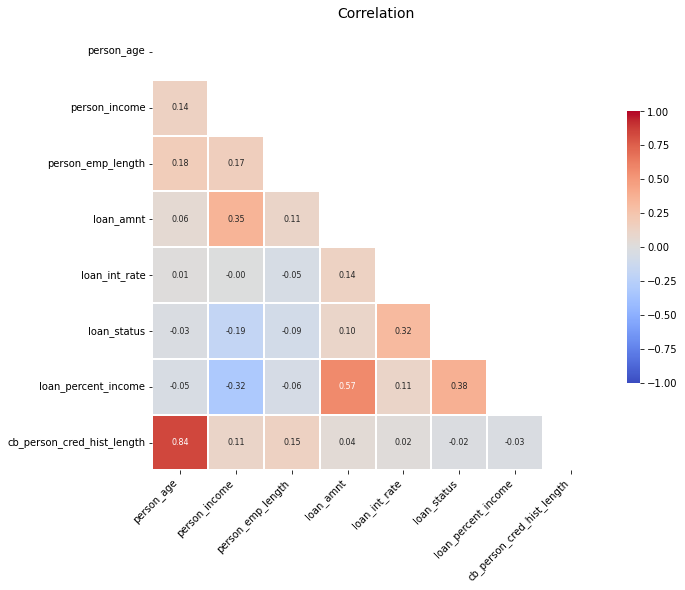

In [71]:
plot_correlation(data[num_columns])

In [72]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_nan,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,11.14,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,12.87,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,15.23,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,14.27,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,7.14,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [74]:
selected_features = ['person_age', 'person_income', 'person_emp_length', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                     'cb_person_default_on_file_N',
                     'cb_person_default_on_file_Y']

## L1 Regularization

In [75]:
np.logspace(-2,2,5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [76]:
pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__C' : [0.0001, 0.001, 0.01, 0.1, 2, 1, 3, 4, 5, 10, 100, 1000],
     'classifier__penalty' : ['l1'],
     'classifier__solver' : ['liblinear']
    }]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [77]:
best_clf = clf.fit(X_train[selected_features], np.ravel(y_train))

selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(X_train[selected_features], y_train)
feature_importance_df = pd.DataFrame(
    {
        'feature': X_train[selected_features].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
lasso_model = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
lasso_model

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,feature,importance,selected
5,loan_percent_income,9.949989,True
4,loan_int_rate,0.281208,True
7,cb_person_default_on_file_N,0.202147,True
2,person_emp_length,0.024058,True
0,person_age,0.005895,True
6,cb_person_default_on_file_N,0.000370,True
3,loan_amnt,0.000063,True


# Modeling

In [78]:
def evaluate(true, predicted):
    threshold = 0.5
    pred_threshold = (predicted > threshold).astype(int)
    
    auc = roc_auc_score(true, predicted)
    accuracy = accuracy_score(true, pred_threshold)
    return accuracy, auc

In [79]:
lasso_features = lasso_model['feature'].tolist()

print('Feature selection WOE from Lasso. \nCount: {}, \nVal: {}\n'.format(len(lasso_features),lasso_features))

Feature selection WOE from Lasso. 
Count: 7, 
Val: ['loan_percent_income', 'loan_int_rate', 'cb_person_default_on_file_N', 'person_emp_length', 'person_age', 'cb_person_default_on_file_N', 'loan_amnt']



In [85]:
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_nan,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
23347,29,73000,RENT,2.0,HOMEIMPROVEMENT,A,8000,7.40,0.11,N,7,7.40,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
11082,25,72000,MORTGAGE,9.0,PERSONAL,F,18000,20.89,0.25,Y,4,20.89,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3109,21,18456,RENT,2.0,MEDICAL,C,3500,13.35,0.19,Y,2,13.35,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
29078,28,30000,MORTGAGE,2.0,VENTURE,A,10500,8.94,0.35,N,8,8.94,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
21339,29,60000,RENT,4.0,HOMEIMPROVEMENT,B,5500,10.74,0.09,N,6,10.74,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13565,23,70000,RENT,0.0,VENTURE,A,12700,10.99,0.18,N,2,10.99,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
7602,23,54000,MORTGAGE,8.0,VENTURE,A,3000,5.42,0.06,N,2,5.42,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3642,23,32000,MORTGAGE,4.0,EDUCATION,B,1000,10.59,0.03,N,2,10.59,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
30478,40,86500,MORTGAGE,2.0,HOMEIMPROVEMENT,B,10000,10.25,0.12,N,16,10.25,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [88]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]

In [89]:
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [90]:
X_val = X_val.loc[:,~X_val.columns.duplicated()]

In [92]:
X_train[best_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file_N,cb_person_default_on_file_Y
23347,29,73000,2.0,8000,7.40,0.11,1,0
11082,25,72000,9.0,18000,20.89,0.25,0,1
3109,21,18456,2.0,3500,13.35,0.19,0,1
29078,28,30000,2.0,10500,8.94,0.35,1,0
21339,29,60000,4.0,5500,10.74,0.09,1,0
...,...,...,...,...,...,...,...,...
13565,23,70000,0.0,12700,10.99,0.18,1,0
7602,23,54000,8.0,3000,5.42,0.06,1,0
3642,23,32000,4.0,1000,10.59,0.03,1,0
30478,40,86500,2.0,10000,10.25,0.12,1,0


# Export Model

In [93]:
SEED = 42
best_features = selected_features
best_model = LogisticRegression(solver='lbfgs', C = 1000, max_iter=100, penalty='l2', random_state=SEED)
best_model.fit(X_train[best_features], y_train)

yhat_train = best_model.predict_proba(X_train[best_features])[:, 1]
yhat_val = best_model.predict_proba(X_val[best_features])[:, 1]
yhat_test = best_model.predict_proba(X_test[best_features])[:, 1]

threshold = 0.6

print("Summary of model: ")
print("Accuracy Score Train:", accuracy_score(y_train, (yhat_train > threshold).astype(int)))
print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))
print("Accuracy Score Validation:", accuracy_score(y_val, (yhat_val > threshold).astype(int)))
print("ROC-AUC Score Validation:", roc_auc_score(y_val, yhat_val))
print("Accuracy Score Test:", accuracy_score(y_test, (yhat_test > threshold).astype(int)))
print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

Summary of model: 
Accuracy Score Train: 0.7870355476918127
ROC-AUC Score Train: 0.7604735241197844
Accuracy Score Validation: 0.7852662055653853
ROC-AUC Score Validation: 0.7616542482054641
Accuracy Score Test: 0.785427054849606
ROC-AUC Score Test: 0.765661916410978


In [94]:
X_train[best_features]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file_N,cb_person_default_on_file_Y
23347,29,73000,2.0,8000,7.40,0.11,1,0
11082,25,72000,9.0,18000,20.89,0.25,0,1
3109,21,18456,2.0,3500,13.35,0.19,0,1
29078,28,30000,2.0,10500,8.94,0.35,1,0
21339,29,60000,4.0,5500,10.74,0.09,1,0
...,...,...,...,...,...,...,...,...
13565,23,70000,0.0,12700,10.99,0.18,1,0
7602,23,54000,8.0,3000,5.42,0.06,1,0
3642,23,32000,4.0,1000,10.59,0.03,1,0
30478,40,86500,2.0,10000,10.25,0.12,1,0


In [95]:
# Export Model

MODELNAME = 'Model-1.0.0.pkl'

with open(MODELNAME, 'wb') as f: # save model
    pickle.dump(best_model, f)

In [83]:
selected_features = ['person_age', 'person_income', 'person_emp_length', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                     'cb_person_default_on_file_N',
                     'cb_person_default_on_file_Y']

In [47]:
# Example Input for Deployment
test_raw = pd.read_csv('credit_risk_dataset.csv')
sample = test_raw.sample(n=1, random_state=1)
sample = sample.to_dict('r')[0]
sample

{'person_age': 23,
 'person_income': 21000,
 'person_home_ownership': 'RENT',
 'person_emp_length': 2.0,
 'loan_intent': 'DEBTCONSOLIDATION',
 'loan_grade': 'C',
 'loan_amnt': 3000,
 'loan_int_rate': 12.68,
 'loan_status': 0,
 'loan_percent_income': 0.14,
 'cb_person_default_on_file': 'Y',
 'cb_person_cred_hist_length': 2}

In [96]:
test_set = X_test.copy()
test_set.loc[:, target] = y_test
test_set.loc[:, 'score_proba'] = yhat_test
test_set.loc[:, 'prediction'] = (yhat_test > threshold).astype(int)

In [97]:
sample_val = test_set.sample(n=1, random_state=SEED)
sample_val = sample_val.to_dict('r')[0]
sample_val

{'person_age': 22,
 'person_income': 70000,
 'person_home_ownership': 'MORTGAGE',
 'person_emp_length': 6.0,
 'loan_intent': 'VENTURE',
 'loan_grade': 'B',
 'loan_amnt': 6000,
 'loan_int_rate': 11.49,
 'loan_percent_income': 0.09,
 'cb_person_default_on_file': 'N',
 'cb_person_cred_hist_length': 2,
 'loan_int_rate_nan': 11.49,
 'person_home_ownership_MORTGAGE': 1,
 'person_home_ownership_OTHER': 0,
 'person_home_ownership_OWN': 0,
 'person_home_ownership_RENT': 0,
 'loan_intent_DEBTCONSOLIDATION': 0,
 'loan_intent_EDUCATION': 0,
 'loan_intent_HOMEIMPROVEMENT': 0,
 'loan_intent_MEDICAL': 0,
 'loan_intent_PERSONAL': 0,
 'loan_intent_VENTURE': 1,
 'loan_grade_A': 0,
 'loan_grade_B': 1,
 'loan_grade_C': 0,
 'loan_grade_D': 0,
 'loan_grade_E': 0,
 'loan_grade_F': 0,
 'loan_grade_G': 0,
 'cb_person_default_on_file_N': 1,
 'cb_person_default_on_file_Y': 0,
 'loan_status': 0,
 'score_proba': 0.09694193831738365,
 'prediction': 0}